In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('customer churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [7]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype ("float")

#checking null values in entire data

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#checking duplicates based on any unique column

In [18]:
df["customerID"].duplicated().sum()

np.int64(0)

##checking duplicates

In [20]:
df.duplicated().sum()

np.int64(0)

#converting values of SeniorCitizen from (0,1) to (yes and no)

In [22]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)
        

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#count of customers by chrun

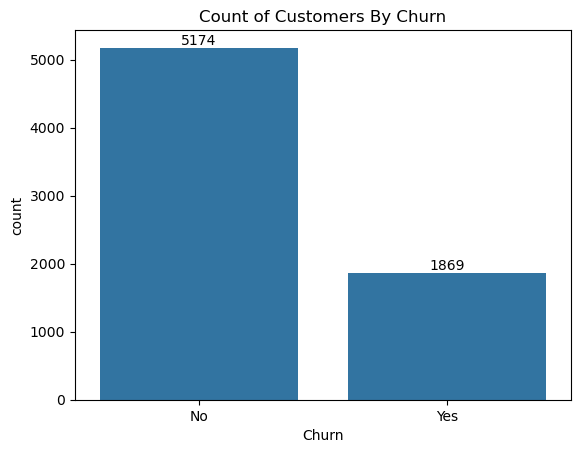

In [31]:
ax = sns.countplot(x = "Churn", data = df)

plt.title("Count of Customers By Churn")

ax.bar_label(ax.containers[0])
plt.show()

#checking how percent people Churn

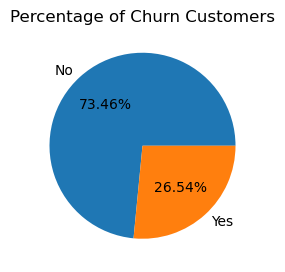

In [32]:
plt.figure(figsize = (3,4))

plt.title("Percentage of Churn Customers")


gb = df.groupby("Churn").agg({'Churn':"count"})

plt.pie(gb['Churn'],labels = gb.index, autopct = "%1.2f%%")
plt.show()

#from the given pie chart 26.54% customers have churned out.
so lets explore the reason bheind it

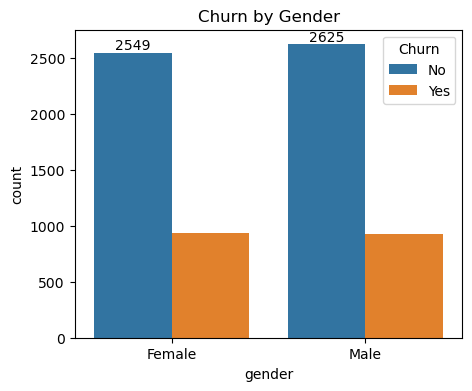

In [46]:
plt.figure(figsize = (5,4))
plt.title("Churn by Gender")

ax = sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

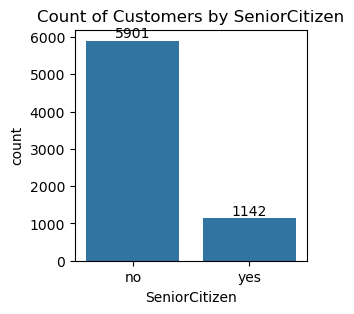

In [61]:
plt.figure(figsize = (3,3))
plt.title("Count of Customers by SeniorCitizen")
ax = sns.countplot(x="SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.show()

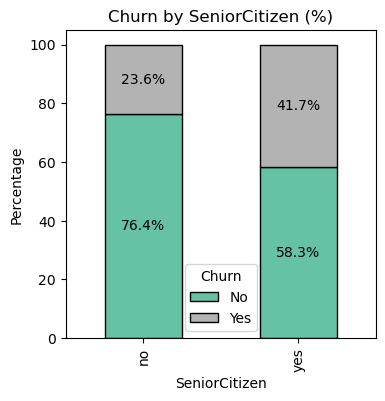

In [55]:

counts = df.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="Count")

counts["Percentage"] = counts["Count"] / counts.groupby("SeniorCitizen")["Count"].transform("sum") * 100

pivot_df = counts.pivot(index="SeniorCitizen", columns="Churn", values="Percentage")

ax = pivot_df.plot(
    kind="bar",
    stacked=True,
    figsize=(4, 4),
    colormap="Set2",
    edgecolor="black"
)

plt.title("Churn by SeniorCitizen (%)")
plt.ylabel("Percentage")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.legend(title="Churn")
plt.show()


#Comparative a greater perecentage of peoples in senior citizen catagery have churned

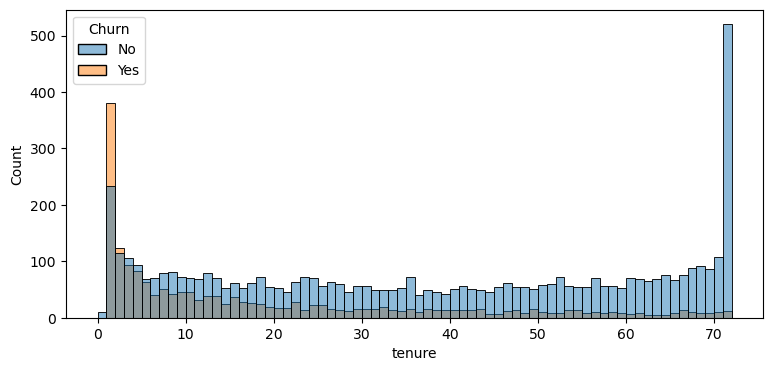

In [67]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

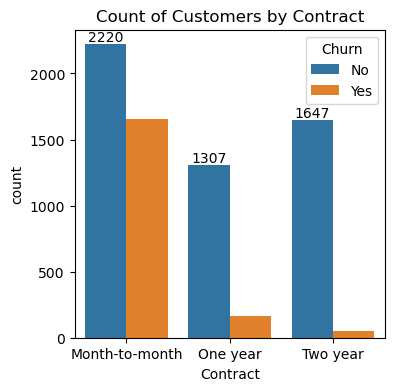

In [71]:
plt.figure(figsize = (4,4))
plt.title("Count of Customers by Contract")
ax = sns.countplot(x="Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.show()

#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract. 

In [72]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

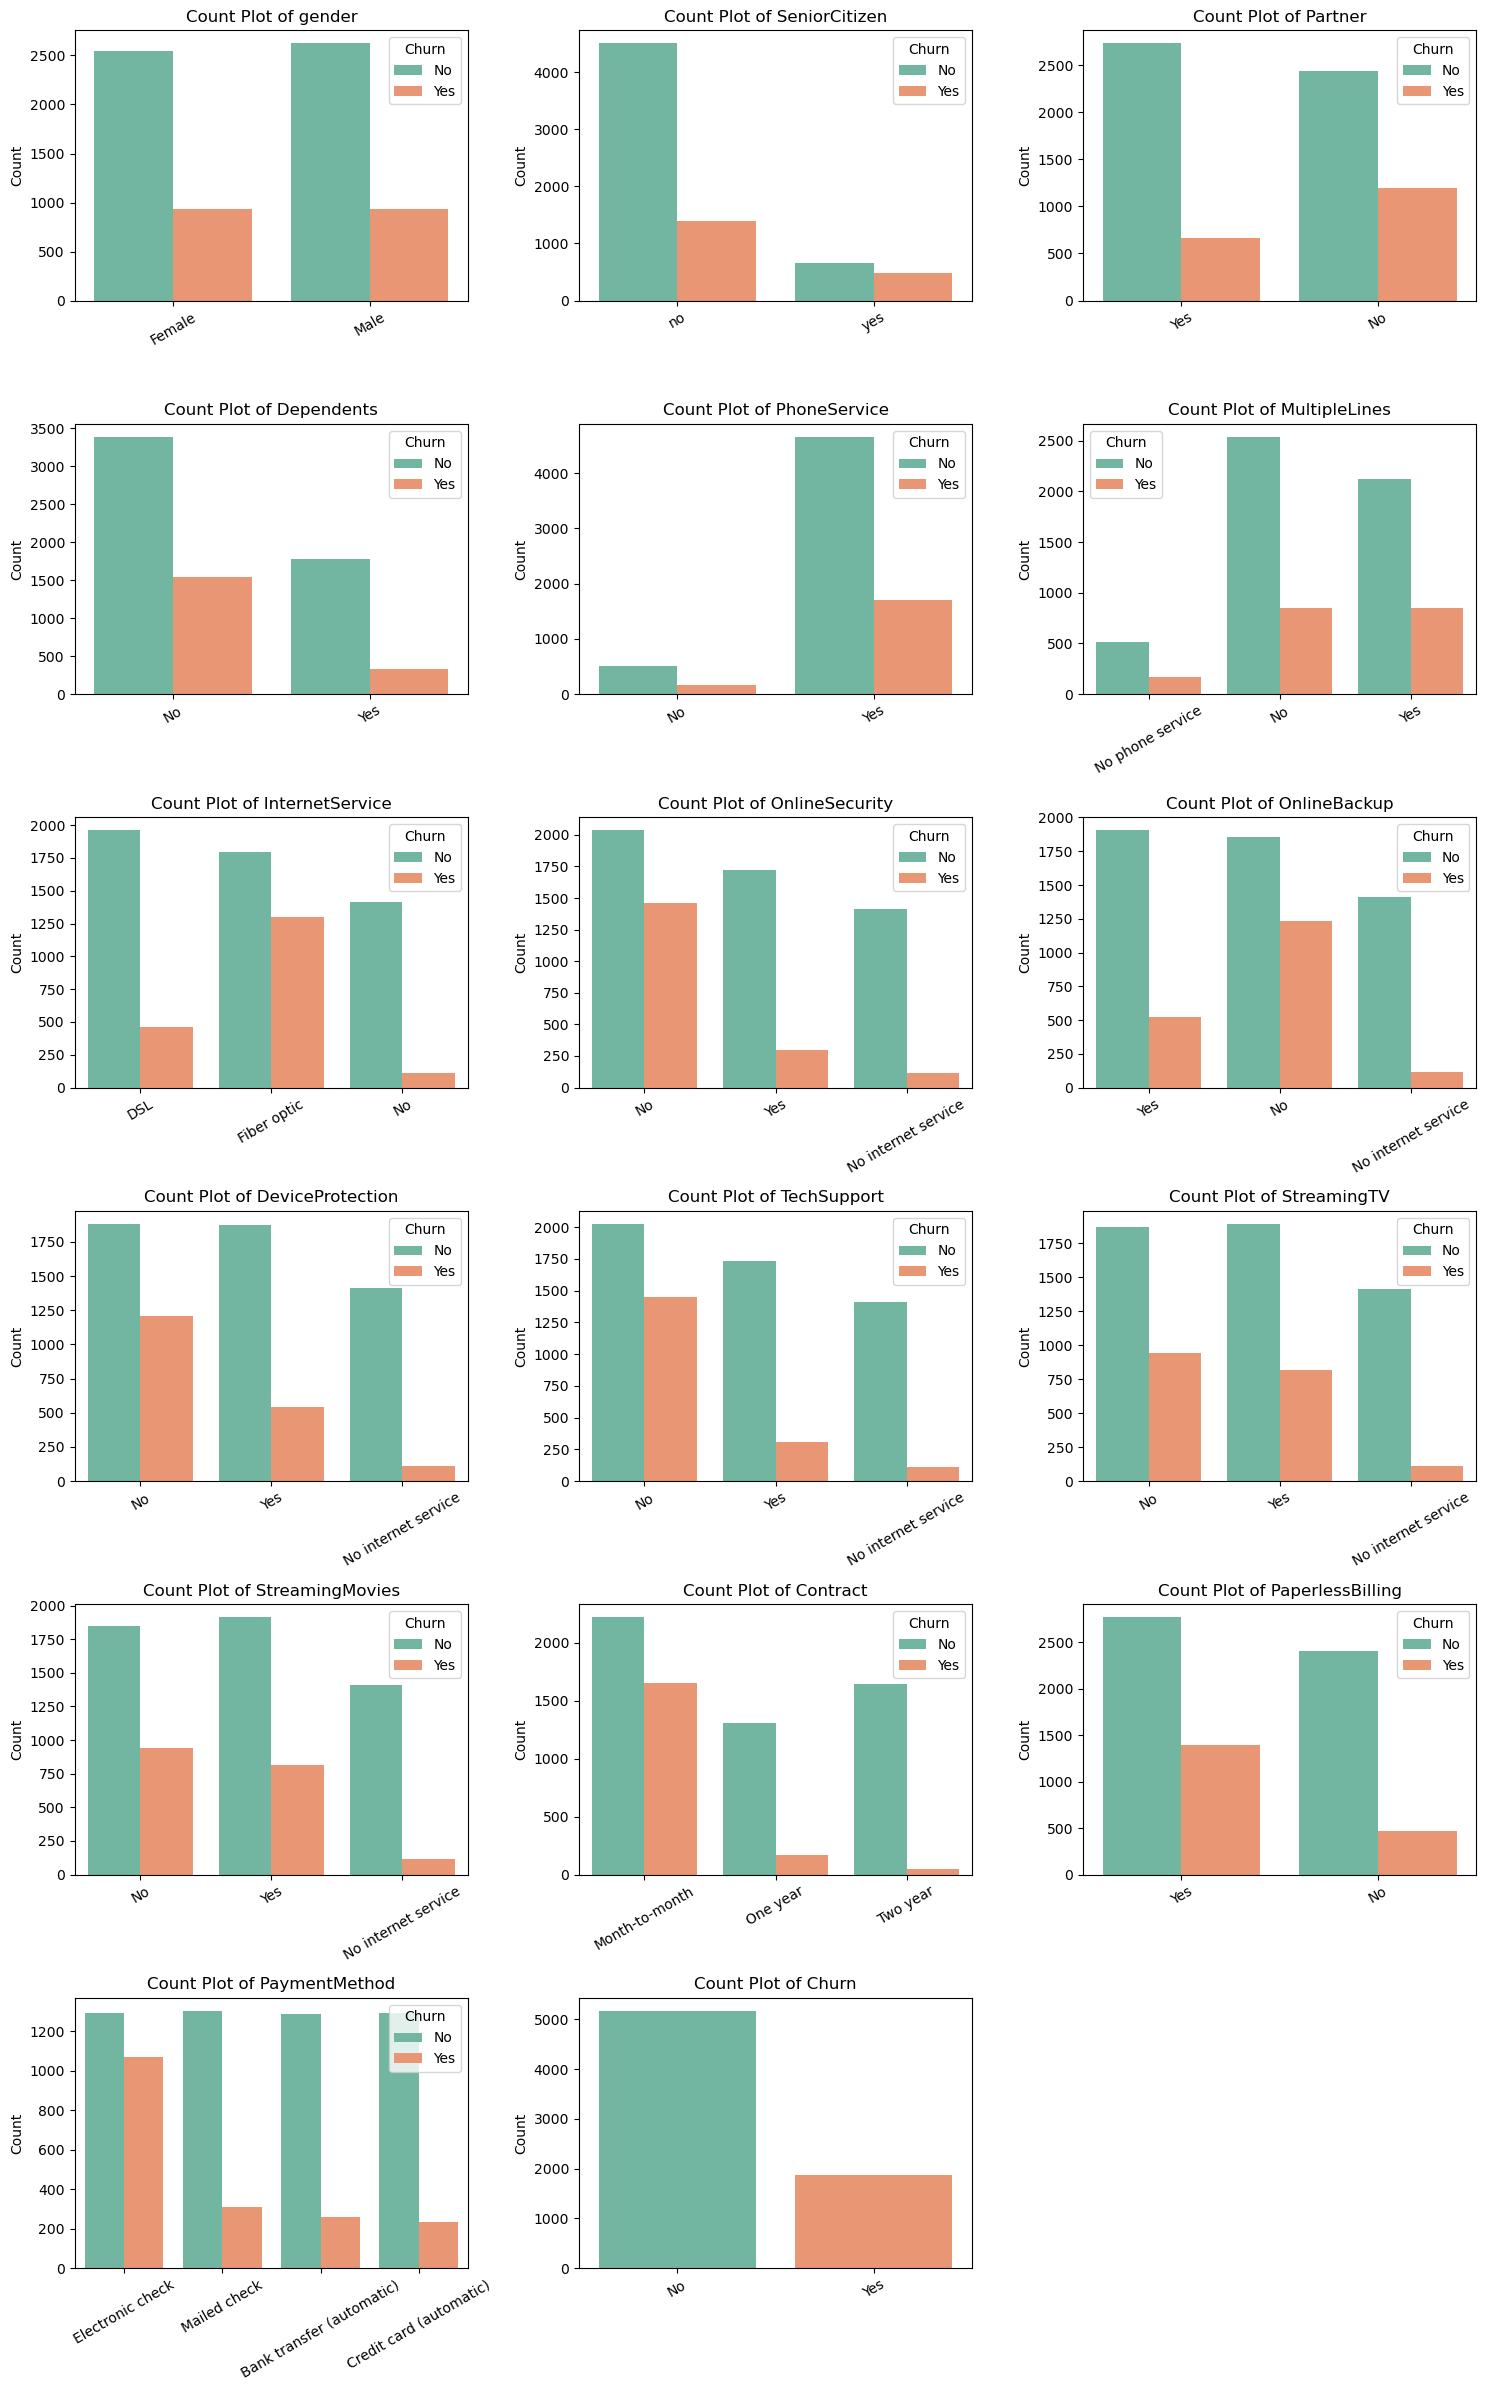

In [75]:
cat_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]
n_cols = 3
n_rows = -(-len(cat_cols) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], palette="Set2", hue = df["Churn"])
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)  # rotate labels if needed

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#The visualizations present count plots showing customer churn (Yes or No) across various service features such as PhoneService, MultipleLines, InternetService, and OnlineSecurity. The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. The charts emphasize the relationship between service usage and customer churn.

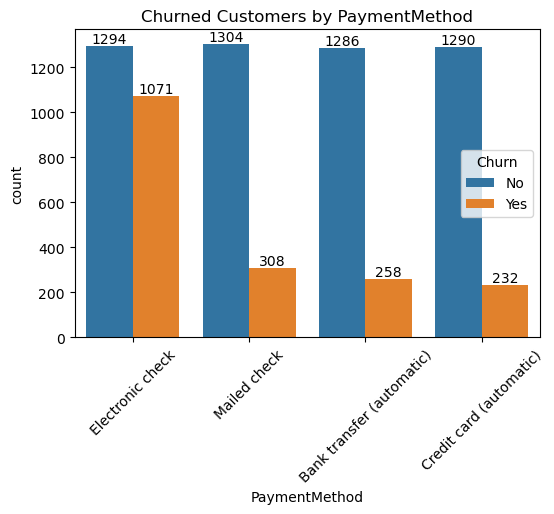

In [78]:
plt.figure(figsize = (6,4))
plt.title("Churned Customers by PaymentMethod")
ax = sns.countplot(x="PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation = 45)

plt.show()

#customers are  likely to churn when he is using electronic check as payment method